# Weight Initialization
이번 시간에는 neural network의 weight를 초기화하는 방법에 대해서 다루어 보겠습니다. weight를 적절하게 초기화 하는 것은 neural network가 최적의 성능에 더욱 잘 도달하는데 중요한 요소입니다. 더욱 잘 초기화 된 weight라면, solution에 더욱 빠르게 도달하는 것이죠.

## Testing Weights
### Dataset
weight에 따른 차이를 알아보기 위해 간단한 [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database)을 사용할 것입니다. MNIST dataset은 숫자 0~9로 구성된 흑백 손글씨 데이터 셋입니다. 아래 셀을 실행시키면 dataset을 다운받아 로드하여 학습할 준비를 합니다.

In [1]:
%matplotlib inline

import tensorflow as tf
import helper

from tensorflow.examples.tutorials.mnist import input_data

print('Getting MNIST Dataset...')
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print('Data Extracted.')

Getting MNIST Dataset...
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Data Extracted.


### Neural Network
<img style="float: left" src="images/neural_network.png"/>

실험을 위해 3 layer로 된 ReLU activation, 그리고 Adam optimizer로 구성된 neural network를 만듭니다. 
그리고 각 layer에 대한 weight를 할당합니다.

In [2]:
# Save the shapes of weights for each layer
layer_1_weight_shape = (mnist.train.images.shape[1], 256)
layer_2_weight_shape = (256, 128)
layer_3_weight_shape = (128, mnist.train.labels.shape[1])

## Initialize Weights
### All Zeros or Ones
만약 [Occam's razor](https://en.wikipedia.org/wiki/Occam's_razor) principle을 따른다고 생각하면, 모든 weight들을 0이나 1로 초기화 하는 것이 정답이라고 생각할지도 모릅니다. 하지만 그렇지 않습니다. 모든 weight가 같은 숫자라면 각 layer의 모든 neuron들은 같은 output을 낼 것입니다. 따라서 weight가 조정되기 매우 어렵습니다. 

그럼 실제로 실험을 통해 비교를 해보도록 하겠습니다.
    `helper.compare_init_weights` 를 이용하여 모든 weight를 0 또는 1로 초기화한 신경망의 loss를 비교해보겠습니다. 이 함수는 설정한 weight 초기값에 대하여 2epoch동안 학습을 수행하여 첫 100 batch에 대한 loss그래프를 보여줍니다. 따라서 어떤 경우가 최적 값에 빠르게 도달하는지, 좋은 결과를 낼 수 있는지 알 수 있죠. 
    
아래 셀을 실행시키면 실험을 시작합니다.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



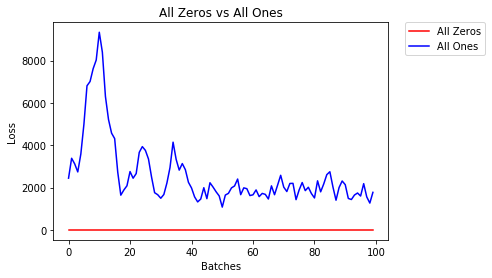

After 858 Batches (2 Epochs):
Validation Accuracy
   11.260% -- All Zeros
    9.900% -- All Ones
Loss
    2.304  -- All Zeros
  186.098  -- All Ones


In [3]:
all_zero_weights = [
    tf.Variable(tf.zeros(layer_1_weight_shape)),
    tf.Variable(tf.zeros(layer_2_weight_shape)),
    tf.Variable(tf.zeros(layer_3_weight_shape))
]

all_one_weights = [
    tf.Variable(tf.ones(layer_1_weight_shape)),
    tf.Variable(tf.ones(layer_2_weight_shape)),
    tf.Variable(tf.ones(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'All Zeros vs All Ones',
    [
        (all_zero_weights, 'All Zeros'),
        (all_one_weights, 'All Ones')])

위 결과에서 볼 수 있듯이, 0 혹은 1 두 초기 값에 대한 결과는 10% 내외로 굉장히 실망스럽습니다.

전에 말했듯이, neural network는 모든 node에 대하여 같은 값을 출력하므로, weight는 쉽게 변하지 않기 때문입니다. 이런 문제를 피하기 위해서 weight는 모두 같은 값이 아닌 랜덤하게 선택된 서로 다른 값들을 가져야 합니다. random weight를 설정하는 좋은 방법은 연속균등분포(uniform distribution)를 이용하는 것입니다.

### Uniform Distribution
[uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous%29)은 특정 범위에서 동일한 확률로 숫자를 선택한 집합입니다. 연속 범위 내에서 하나의 숫자를 고르므로, 모든 weight들은 고른 분포로 서로 다른 숫자들을 갖습니다. 우리는 텐서플로우의 `tf.random_uniform` 함수를 사용해 uniform distribution을 갖는 weight를 만들 수 있습니다.

>#### [`tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)`](https://www.tensorflow.org/api_docs/python/tf/random_uniform)
>Outputs random values from a uniform distribution.

>The generated values follow a uniform distribution in the range [minval, maxval). The lower bound minval is included in the range, while the upper bound maxval is excluded.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **minval:** A 0-D Tensor or Python value of type dtype. The lower bound on the range of random values to generate. Defaults to 0.
- **maxval:** A 0-D Tensor or Python value of type dtype. The upper bound on the range of random values to generate. Defaults to 1 if dtype is floating point.
- **dtype:** The type of the output: float32, float64, int32, or int64.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

우리는 uniform distribution을 histogram으로 시각화 할 수 있습니다.
`tf.random_uniform([1000], -3, 3)`을 시각화해보도록 하죠.
`helper.hist_dist`함수를 사용합니다. 이것은 `-3`에서 `3`까지 `1000`개의 random float values를 만들어냅니다.

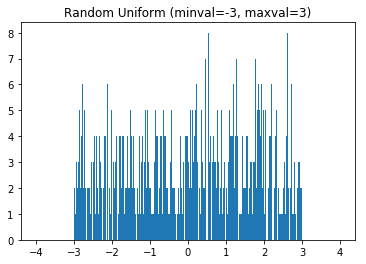

In [4]:
helper.hist_dist('Random Uniform (minval=-3, maxval=3)', tf.random_uniform([1000], -3, 3))

histogram은 1000개의 값에 대해 500개의 bucket을 가지고 있습니다. 따라서 평균적으로 한 bucket당 2개의 값을 가지고 있습니다. 그림을 보면 어떤 bucket은 2개보다 많은 값들을 가지고 있고, 어떤 bucket은 그렇지 못합니다. 하지만 전체적으로 대략 2개 내외의 값들을 균일한 분포로 갖고 있는 것을 볼 수 있죠.

이제 `tf.random_uniform` 함수가 어떻게 값을 할당하는지 보았습니다. 이제 이 값을 초기값으로 설정해보겠습니다.

### Baseline
`minval=0.0`과 `maxval=1.0`로 설정하고 `tf.random_uniform`함수를 사용합니다.

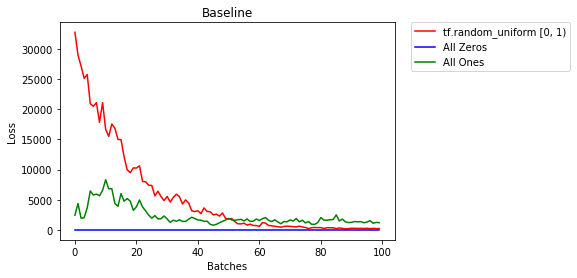

After 858 Batches (2 Epochs):
Validation Accuracy
   74.520% -- tf.random_uniform [0, 1)
   11.260% -- All Zeros
    9.240% -- All Ones
Loss
   20.361  -- tf.random_uniform [0, 1)
    2.296  -- All Zeros
  172.591  -- All Ones


In [9]:
# Default for tf.random_uniform is minval=0 and maxval=1
basline_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape))
]

helper.compare_init_weights(
    mnist,
    'Baseline',
    [(basline_weights, 'tf.random_uniform [0, 1)'),
    (all_zero_weights, 'All Zeros'),
        (all_one_weights, 'All Ones')])

결과는 놀랍습니다. validation Accuracy는 75%대로, weight를 전부 0이나 1로 설정했던 것에 비하여 훨씬 나은 결과를 보여줍니다. loss graph 역시 적절하게 학습되는 것을 볼 수 있습니다. 우리는 옳은 방향으로 가고 있군요.

### General rule for setting weights
weights를 설정하는 방법에는 general rule이 있습니다. 0과 가까우면서 너무 작지 않은 값으로 설정하는 것이죠. 예를 들어 $y=1/\sqrt{n}$라고 할 때 $[-y, y]$의 범위에서 weight를 선택하는 것이 좋은 방법이 될 수 있습니다. ($n$은 input의 갯수입니다.)

만약 이 것이 사실이라면, 한번 해보도록 하죠. 0을 중심으로 [-1, 1) 범위의 값에 대하여 weight를 선택해 보겠습니다.

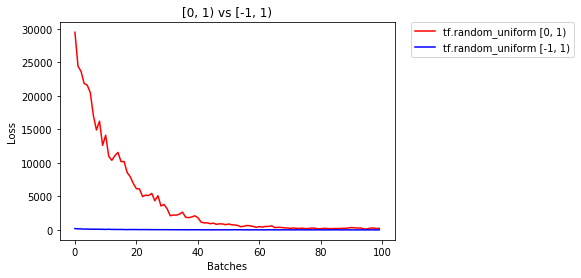

After 858 Batches (2 Epochs):
Validation Accuracy
   70.720% -- tf.random_uniform [0, 1)
   90.180% -- tf.random_uniform [-1, 1)
Loss
    9.087  -- tf.random_uniform [0, 1)
    1.825  -- tf.random_uniform [-1, 1)


In [10]:
uniform_neg1to1_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1, 1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1, 1))
]

helper.compare_init_weights(
    mnist,
    '[0, 1) vs [-1, 1)',
    [
        (basline_weights, 'tf.random_uniform [0, 1)'),
        (uniform_neg1to1_weights, 'tf.random_uniform [-1, 1)')])

90%! 훨씬 더 나아졌습니다. 그저 `[0,1)`에서 `[-1, 1)`로 중심만 0 근방으로 이동했을 뿐인데요. 하지만 우리는 더욱 작은 weight를 원합니다. 어떻게 할 수 있을까요?

### Too small
가장 간단한 방법은 [-1,1)의 범위를 [-0.1, 0.1), [-0.01, 0.01), [-0.001, 0.001)와 같은 방법으로 강제 설정하는 것입니다. 한번 해볼까요? `plot_n_batches=None` 옵션을 주어 모든 batch에 대한 loss를 plot해 봅시다..

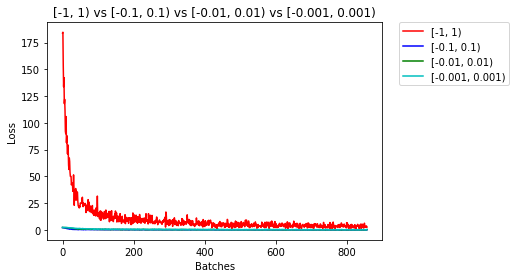

After 858 Batches (2 Epochs):
Validation Accuracy
   90.820% -- [-1, 1)
   97.120% -- [-0.1, 0.1)
   95.480% -- [-0.01, 0.01)
   93.700% -- [-0.001, 0.001)
Loss
    2.576  -- [-1, 1)
    0.108  -- [-0.1, 0.1)
    0.332  -- [-0.01, 0.01)
    0.362  -- [-0.001, 0.001)


In [11]:
uniform_neg01to01_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.1, 0.1)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.1, 0.1))
]

uniform_neg001to001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.01, 0.01)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.01, 0.01))
]

uniform_neg0001to0001_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -0.001, 0.001)),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -0.001, 0.001))
]

helper.compare_init_weights(
    mnist,
    '[-1, 1) vs [-0.1, 0.1) vs [-0.01, 0.01) vs [-0.001, 0.001)',
    [
        (uniform_neg1to1_weights, '[-1, 1)'),
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (uniform_neg001to001_weights, '[-0.01, 0.01)'),
        (uniform_neg0001to0001_weights, '[-0.001, 0.001)')],
    plot_n_batches=None)

    이런.. 생각한대로 되지 않는군요. [-1,1)보다 [-0.1,0.1)이 더 낫지만, 이보다 작아지면 엉망이 되기 시작합니다. 그렇다면 아까 언급했던 `general rule`인 $y=1/\sqrt{n}$를 이용하여 weight를 초기화 해보겠습니다.

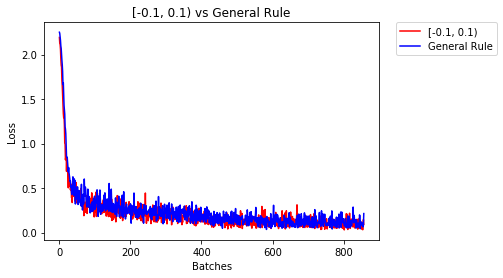

After 858 Batches (2 Epochs):
Validation Accuracy
   97.240% -- [-0.1, 0.1)
   96.800% -- General Rule
Loss
    0.092  -- [-0.1, 0.1)
    0.214  -- General Rule


In [12]:
import numpy as np

general_rule_weights = [
    tf.Variable(tf.random_uniform(layer_1_weight_shape, -1/np.sqrt(layer_1_weight_shape[0]), 1/np.sqrt(layer_1_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_2_weight_shape, -1/np.sqrt(layer_2_weight_shape[0]), 1/np.sqrt(layer_2_weight_shape[0]))),
    tf.Variable(tf.random_uniform(layer_3_weight_shape, -1/np.sqrt(layer_3_weight_shape[0]), 1/np.sqrt(layer_3_weight_shape[0])))
]

helper.compare_init_weights(
    mnist,
    '[-0.1, 0.1) vs General Rule',
    [
        (uniform_neg01to01_weights, '[-0.1, 0.1)'),
        (general_rule_weights, 'General Rule')],
    plot_n_batches=None)

우리가 강제로 설정한 범위 중 가장 나은 결과를 보였던 `[-0.1,0.1]`에 비하여 $y=1/\sqrt{n}$으로 설정한 방법은 매우 비슷한 결과를 낳는군요. 

uniform distribution은 설정한 범위 내에서 동일한 확률로 숫자를 선택합니다. 이 부분을 수정해보겠습니다. 0과 가까울 수록 더욱 높은 확률로 숫자를 뽑을 순 없을까요? 네, 가능합니다. normal distribution을 사용하면 됩니다.

### Normal Distribution
uniform distribution과는 다르게, [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) 은 평균과 가까운 값들을 더욱 높은 확률로 뽑아줍니다. 시각화하기 위해서, TensorFlow의 `tf.random_normal` 함수를 히스토그램으로 plot해 보겠습니다.

>[tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/random_normal)

>Outputs random values from a normal distribution.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

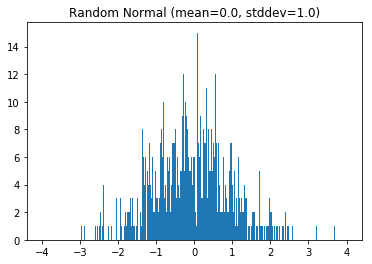

In [13]:
helper.hist_dist('Random Normal (mean=0.0, stddev=1.0)', tf.random_normal([1000]))

이제 normal distribution과 uniform distribution에 대한 결과를 비교해보죠.

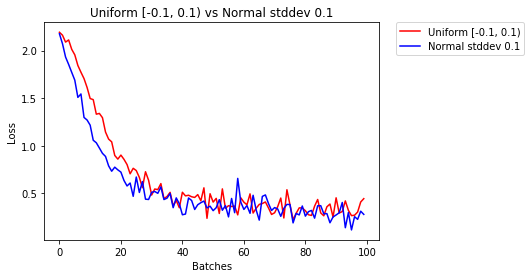

After 858 Batches (2 Epochs):
Validation Accuracy
   96.600% -- Uniform [-0.1, 0.1)
   97.400% -- Normal stddev 0.1
Loss
    0.130  -- Uniform [-0.1, 0.1)
    0.072  -- Normal stddev 0.1


In [15]:
normal_01_weights = [
    tf.Variable(tf.random_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.random_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Uniform [-0.1, 0.1) vs Normal stddev 0.1',
    [
        (uniform_neg01to01_weights, 'Uniform [-0.1, 0.1)'),
        (normal_01_weights, 'Normal stddev 0.1')])

결과를 보면, normal distribution이 아주 약간 정확도와 loss에서 더 나은 결과를 보입니다. 이제 여기서 0에 더 가깝게 만들고 표준편차 `x`를 벗어나는 값들은 과감하게 삭제해보겠습니다. 이러한 분포를 [Truncated Normal Distribution](https://en.wikipedia.org/wiki/Truncated_normal_distribution%29)이라고 합니다.

### Truncated Normal Distribution
>[tf.truncated_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)](https://www.tensorflow.org/api_docs/python/tf/truncated_normal)

>Outputs random values from a truncated normal distribution.

>The generated values follow a normal distribution with specified mean and standard deviation, except that values whose magnitude is more than 2 standard deviations from the mean are dropped and re-picked.

>- **shape:** A 1-D integer Tensor or Python array. The shape of the output tensor.
- **mean:** A 0-D Tensor or Python value of type dtype. The mean of the truncated normal distribution.
- **stddev:** A 0-D Tensor or Python value of type dtype. The standard deviation of the truncated normal distribution.
- **dtype:** The type of the output.
- **seed:** A Python integer. Used to create a random seed for the distribution. See tf.set_random_seed for behavior.
- **name:** A name for the operation (optional).

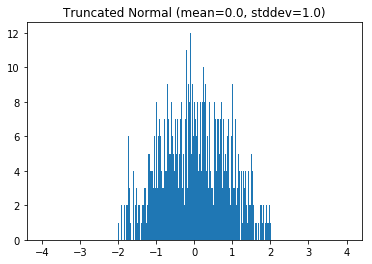

In [16]:
helper.hist_dist('Truncated Normal (mean=0.0, stddev=1.0)', tf.truncated_normal([1000]))

이제 이 분포로 weight를 할당하고 이전의 결과와 비교해보겠습니다.

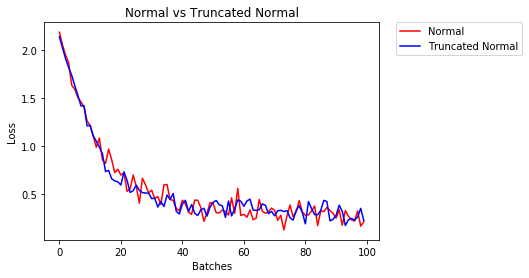

After 858 Batches (2 Epochs):
Validation Accuracy
   97.180% -- Normal
   96.740% -- Truncated Normal
Loss
    0.032  -- Normal
    0.036  -- Truncated Normal


In [20]:
trunc_normal_01_weights = [
    tf.Variable(tf.truncated_normal(layer_1_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(
        layer_2_weight_shape, stddev=0.1)),
    tf.Variable(tf.truncated_normal(layer_3_weight_shape, stddev=0.1))
]

helper.compare_init_weights(
    mnist,
    'Normal vs Truncated Normal',
    [
        (normal_01_weights, 'Normal'),
        (trunc_normal_01_weights, 'Truncated Normal')])

언뜻 보자면, 큰 차이가 없는 것처럼 보입니다. 큰 차이가 나지 않은 이유는 우리가 사용한 neural network가 매우 작기 때문입니다. 더욱 큰 Neural network는 normal distribution의 값을 더 많이 가지고, 표준 편차를 벗어나는 값 역시 더욱 많이 가지기 때문에 오차는 더욱 커질 것입니다.

우리는 처음 weight부터 여러가지 시도를 했습니다. 그럼 얼마나 달라졌는지 한번 비교해보겠습니다.

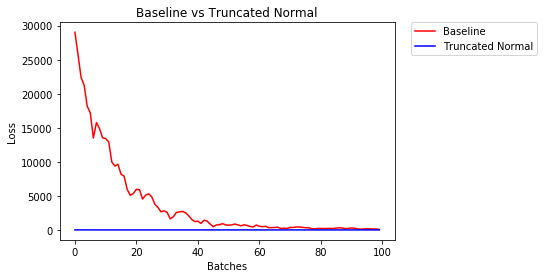

After 858 Batches (2 Epochs):
Validation Accuracy
   74.220% -- Baseline
   96.520% -- Truncated Normal
Loss
   12.860  -- Baseline
    0.066  -- Truncated Normal


In [18]:
helper.compare_init_weights(
    mnist,
    'Baseline vs Truncated Normal',
    [
        (basline_weights, 'Baseline'),
        (trunc_normal_01_weights, 'Truncated Normal')])

정말 큰 변화입니다. Weight를 uniform distribution에서 Truncated Normal Distribution으로 바꾸었을 뿐인데, 정확도가 20%이상 차이가 납니다. loss 그래프에서는 truncated normal line을 거의 볼 수 없을 정도입니다. 하지만, 이것으로 weight를 설정하는 방법을 모두 배운 것은 아닙니다. weight를 더욱 잘 설정하는 방법에 대한 글을 준비했습니다. 한번 읽어보시길 권합니다!

In [ ]:
## Additional Reading Materials

[Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
[Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification](https://arxiv.org/pdf/1502.01852v1.pdf)
[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/pdf/1502.03167v2.pdf)
